In [1]:
from google.colab import auth
auth.authenticate_user()

# Konfigurasi identitas GitHub
!git config --global user.email "satriadivop354@gmail.com"
!git config --global user.name "SatriaDivo"

# Clone repository dengan URL yang benar
!git clone https://@github.com/IET-Polinela/intro-to-colab-SatriaDivo.git

# Masuk ke direktori repository
%cd intro-to-colab-SatriaDivo

Cloning into 'intro-to-colab-SatriaDivo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 68.02 KiB | 68.02 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/intro-to-colab-SatriaDivo


Accuracy: 1.00


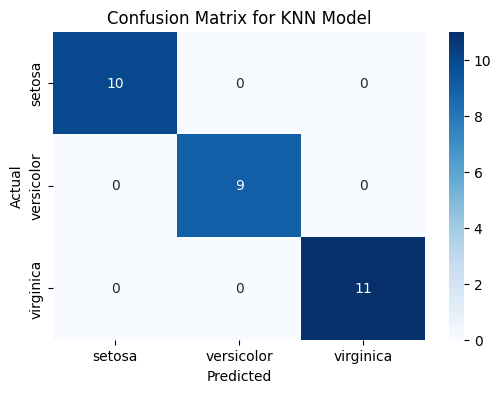

In [ ]:
# %%writefile iris_knn.py

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Buat model KNN dan latih
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN Model")

# Simpan gambar
plt.savefig("knn_confusion_matrix.png")

plt.show()

In [ ]:
!python iris_knn.py

Accuracy: 1.00
Figure(600x400)


In [ ]:
!git add .
!git commit -m “iris_knn.py”
!git push origin main

[main 0fd55ef] “iris_knn.py”
 2 files changed, 44 insertions(+)
 create mode 100644 iris_knn.py
 create mode 100644 knn_confusion_matrix.png
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 19.45 KiB | 9.73 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/IET-Polinela/intro-to-colab-SatriaDivo.git
   4970bb6..0fd55ef  main -> main


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9093 - loss: 0.2977 - val_accuracy: 0.9792 - val_loss: 0.0651
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9847 - loss: 0.0500 - val_accuracy: 0.9825 - val_loss: 0.0467
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9901 - loss: 0.0326 - val_accuracy: 0.9865 - val_loss: 0.0418
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9839 - val_loss: 0.0472
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9957 - loss: 0.0144 - val_accuracy: 0.9858 - val_loss: 0.0462
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9827 - loss: 0.0577
Test accuracy: 0.99
Evaluation results saved to evaluation.txt.


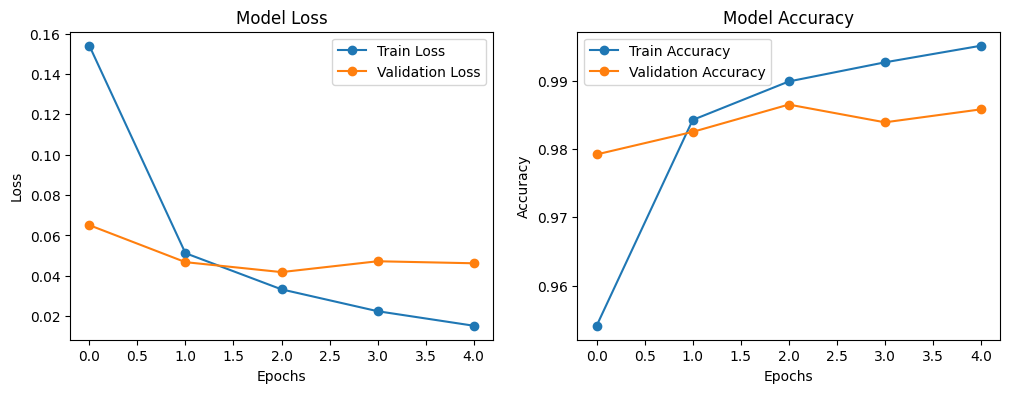

Training performance plot saved to training_performance.png.


In [ ]:
# %%writefile mnist_cnn.py

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load dataset MNIST
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Buat model CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model & simpan history
history = model.fit(X_train.reshape(-1,28,28,1), y_train, epochs=5,
                    validation_data=(X_test.reshape(-1,28,28,1), y_test))

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test.reshape(-1,28,28,1), y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Simpan hasil evaluasi ke file teks
with open("evaluation.txt", "w") as f:
    f.write(f"Test Loss: {test_loss}\n")
    f.write(f"Test Accuracy: {test_acc:.2f}\n")
print("Evaluation results saved to evaluation.txt.")

# Visualisasi Loss & Akurasi
history_dict = history.history
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Loss
ax[0].plot(history_dict['loss'], label="Train Loss", marker='o')
ax[0].plot(history_dict['val_loss'], label="Validation Loss", marker='o')
ax[0].set_title("Model Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

# Plot Accuracy
ax[1].plot(history_dict['accuracy'], label="Train Accuracy", marker='o')
ax[1].plot(history_dict['val_accuracy'], label="Validation Accuracy", marker='o')
ax[1].set_title("Model Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

# Simpan grafik ke dalam file
plt.savefig("training_performance.png")
plt.show()

print("Training performance plot saved to training_performance.png.")

In [ ]:
!python mnist_cnn.py

2025-03-03 09:31:23.110260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740994283.128935    6407 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740994283.134537    6407 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-03 09:31:27.097377: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Ov

In [ ]:
!git add mnist_cnn.py training_performance.png evaluation.txt
!git commit -m “mnist_knn.py”
!git push origin main

[main 6412c1e] “mnist_knn.py”
 3 files changed, 66 insertions(+)
 create mode 100644 evaluation.txt
 create mode 100644 mnist_cnn.py
 create mode 100644 training_performance.png
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 47.82 KiB | 15.94 MiB/s, done.
Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/IET-Polinela/intro-to-colab-SatriaDivo.git
   0fd55ef..6412c1e  main -> main


# **Menyimpan file .ipynb ke GitHub**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Collab/Lab1_23758056.ipynb" "/content/supervised-learning-SatriaDivo/"